# Практическая работа «Кластеризация. Метод k-средних»

## Цель практической работы

- Научиться строить модель кластеризации на реальных данных.

## Что входит в работу


- Загрузить данные и провести разведочный анализ.
- Предположить оптимальное количество кластеров.
- Построить модель кластеризации с помощью  библиотеки scikit-learn.
- Вычислить оптимальное количество кластеров.
- Интерпретировать результаты.

## Что оценивается

*   Выполнены все этапы задания.
*   Сделаны выводы по результатам.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (с расширением .ipynb) или ссылку на него.


## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [86]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [6]:
df['Annual Income (k$)'].value_counts()

Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

In [11]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [5]:
df['Age'].value_counts()

Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64

In [12]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [36]:
df[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].corr()

,Annual Income (k$),Age,Spending Score (1-100)
Annual Income (k$),1.000000,-0.012398,0.009903
Age,-0.012398,1.000000,-0.327227
Spending Score (1-100),0.009903,-0.327227,1.000000


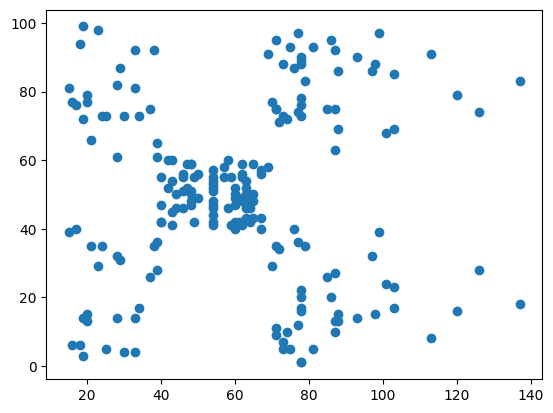

In [37]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

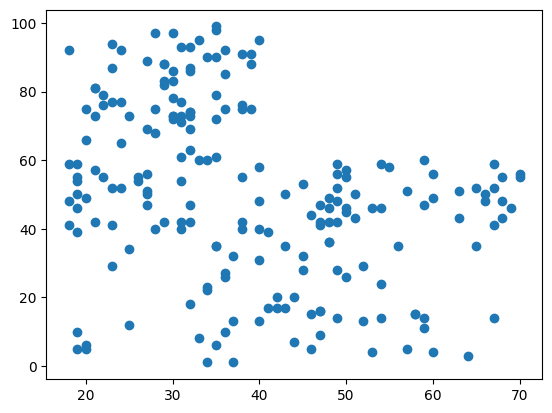

In [38]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

In [ ]:
# 5 кластеров

### Задание 3

Преобразуйте категориальный признак Genre в численный. Аргументируйте выбор метода кодирования признака.

In [87]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df['Genre'] = LabelEncoder().fit(df['Genre']).transform(df['Genre'])

# ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# ft = ohe.fit_transform(df[['Genre']])
# df[ohe.get_feature_names_out()] = ft
df = df.drop(columns=['CustomerID'])
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

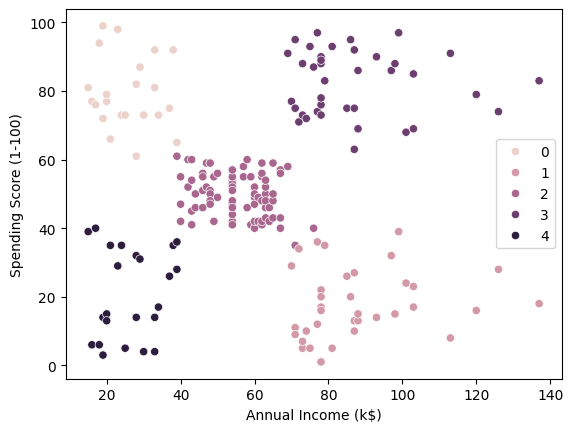

In [90]:
km_all = KMeans(n_clusters=5).fit(df)
points = km_all.predict(df)

sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=points)

<Axes: >

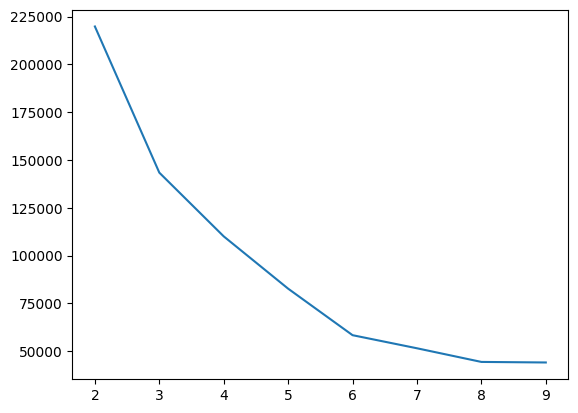

In [89]:
n_clusters = list(range(2, 10))

metrics = []

for k in n_clusters:
  km = KMeans(n_clusters=k).fit(df)
  metrics.append(km.inertia_)

sns.lineplot(x=n_clusters, y=metrics)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

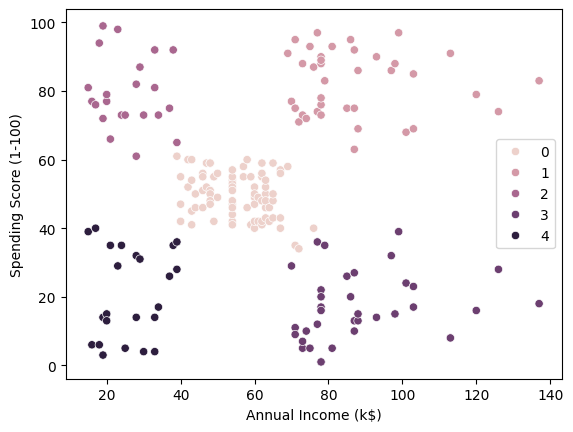

In [91]:
km_income = KMeans(n_clusters=5).fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
points = km_income.predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=points)

<Axes: >

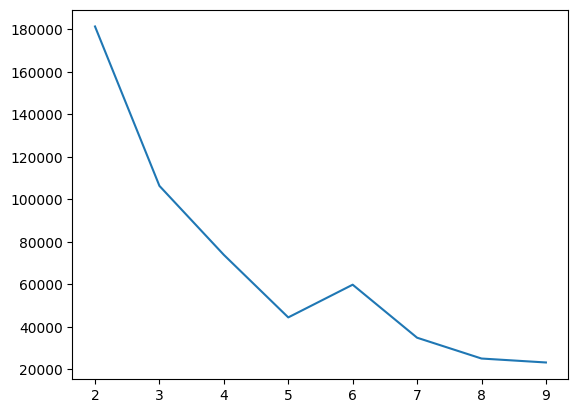

In [92]:
n_clusters = list(range(2, 10))

metrics = []

for k in n_clusters:
  km = KMeans(n_clusters=k).fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  metrics.append(km.inertia_)

sns.lineplot(x=n_clusters, y=metrics)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

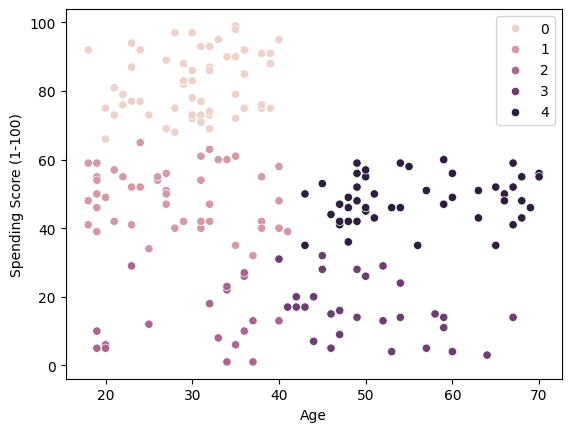

In [93]:
km_age = KMeans(n_clusters=5).fit(df[['Age', 'Spending Score (1-100)']])
points = km_age.predict(df[['Age', 'Spending Score (1-100)']])

sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=points)

<Axes: >

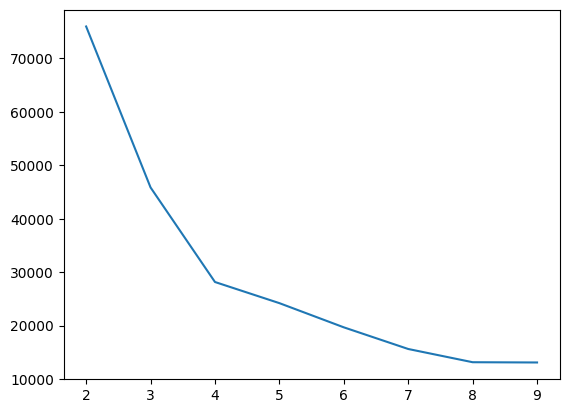

In [94]:
n_clusters = list(range(2, 10))

metrics = []

for k in n_clusters:
  km = KMeans(n_clusters=k).fit(df[['Age', 'Spending Score (1-100)']])
  metrics.append(km.inertia_)

sns.lineplot(x=n_clusters, y=metrics)

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

In [95]:
km_best = KMeans(n_clusters=6).fit(df)

### Задание 6 (выполните по желанию)

При работе с данными важно не только качество моделей машинного обучения, но и интерпретация полученных результатов и представление их в виде, понятном пользователям и заказчикам.

После построения модели кластеризации вы разбили покупателей на группы. Теперь важно интерпретировать эти группы, то есть создать профиль группы. 

В качестве профиля группы часто используют её типичного представителя. В кластерах типичным представителем можно назвать центроиду кластера. В sklearn получить список центроид можно с помощью атрибута `cluster_centers_` у объекта класса KMeans (этот атрибут возвращает матрицу с размерностями (количество кластеров, количество признаков), подробнее об этом [в материале](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)). 

Получите центроиды кластеров, преобразуйте их к датафрейму, опишите типичного представителя каждой группы и чем группы отличаются друг от друга. При описании и сравнении используйте методы визуализации.

In [96]:
profile_users = pd.DataFrame(data=km_best.cluster_centers_, columns=df.columns)
profile_users

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.444444,56.155556,53.377778,49.088889
1,0.461538,32.692308,86.538462,82.128205
2,0.558824,41.647059,88.735294,16.764706
3,0.391304,25.521739,26.304348,78.565217
4,0.368421,27.315789,57.500000,48.447368
5,0.380952,44.142857,25.142857,19.523810
